# Impeachment Polling Data from FiveThirtyEight
https://data.fivethirtyeight.com

TODO: Plot the different category options, and for reps versus dems. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
def convert(df):
    dates = pd.to_datetime(df['End'])
    df['Date'] = dates
    df = df.sort_values('Date', ascending=True)
    df = df.set_index('Date')
    
    # convert anything that makes sense to into a float
    for col in df.columns:
        df[col] = df[col].astype(float,errors='ignore')
    
    return df

In [3]:
impeachment_polls = pd.read_csv('538_impeachment-polls/impeachment-polls.csv')

In [4]:
impeachment_polls.Category.unique()

array(['begin_proceedings', 'begin_inquiry', 'impeach_and_remove',
       'reasons', 'impeach', 'consider', nan, 'Category'], dtype=object)

In [5]:
impeach = 'impeach'
impeachment_polls = impeachment_polls.query('Category==@impeach')

In [6]:
end = 'End'
impeachment_polls = convert(impeachment_polls.query('End!=@end&End==End'))

In [7]:
def plot_approval_with_resampling(results,data_columns,resample_length='M',timewindow=None):
    if timewindow:
        results = results.loc[timewindow[0]:timewindow[1]]
    sampled_mean = results[data_columns].resample(resample_length).median()
    fig, ax = plt.subplots()
    for answer in data_columns:
        ax.plot(results[answer],
        marker='.', linestyle='-', linewidth=0.5,)
        ax.plot(sampled_mean[answer],
        marker='o', markersize=8, linestyle='-', label=answer)
    ax.set_ylabel('Poll Results')
    ax.legend();

/Users/Emily/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Trump Impeachment Polls')

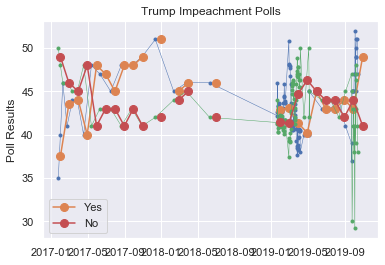

In [8]:
plot_approval_with_resampling(impeachment_polls,['Yes','No'])
plt.title('Trump Impeachment Polls')

Text(0.5, 1.0, 'Trump Impeachment Polls')

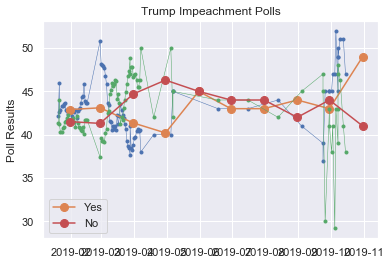

In [9]:
plot_approval_with_resampling(impeachment_polls,['Yes','No'],resample_length='M',timewindow=['2018-10-15','2019-10-15'])
plt.title('Trump Impeachment Polls')

Text(0.5, 1.0, 'Trump Impeachment Polls')

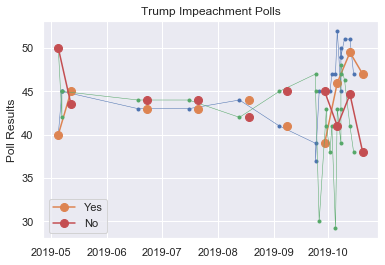

In [10]:
plot_approval_with_resampling(impeachment_polls,['Yes','No'],resample_length='W',timewindow=['2019-05-01','2019-10-15'])
plt.title('Trump Impeachment Polls')

Text(0.5, 1.0, 'Trump Impeachment Polls')

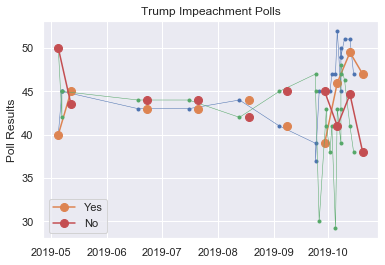

In [11]:
plot_approval_with_resampling(impeachment_polls,['Yes','No'],resample_length='W',timewindow=['2019-05-01','2019-10-15'])
plt.title('Trump Impeachment Polls')